# Example: Simulate a Simple 10" Long WR-2.8 Waveguide

In [1]:
import numpy as np 
import scipy.constants as sc
import matplotlib.pyplot as plt

import disptrans

# SciKit-RF
# https://scikit-rf.readthedocs.io/
import skrf as rf
from skrf.media import RectangularWaveguide, Freespace
from skrf.frequency import Frequency

# SciencePlots (optional)
# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Set frequency sweep

In [2]:
# Full WR-2.8 sweep
freq  = Frequency(260, 400, 1401, 'ghz')
print("Frequency sweep: ", freq)

Frequency sweep:  260.0-400.0 GHz, 1401 pts


# Calculate waveguide properties using Scikit-RF package

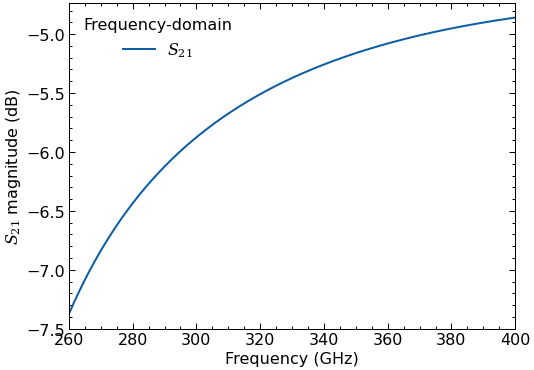

In [3]:
# Create a gold-plated WR-2.8 waveguide
wr2p8 = RectangularWaveguide(freq.copy(), a=28*sc.mil, b=14*sc.mil, rho='au')

# Unpack properties
beta = wr2p8.beta.copy()     # phase constant
vp = wr2p8.v_p.real.copy()   # phase velocity
vg = -wr2p8.v_g.imag.copy()  # group velocity

# Create 10 inch long waveguide
length = 10 * sc.inch
waveguide = wr2p8.line(length, unit='m')
waveguide.name = '2" long WR-2.8 waveguide'

# Unpack
f = freq.f.copy()
npts = len(f)
df = f[1] - f[0]
s21f = waveguide.s[:, 1, 0].copy()

# Plot
plt.figure()
plt.plot(f / sc.giga, 20 * np.log10(np.abs(s21f)), label=r"$S_{21}$")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(title="Frequency-domain")
plt.ylabel(r"$S_{21}$ magnitude (dB)")
plt.xlabel("Frequency (GHz)")
plt.savefig("results/simple-waveguide-frequency.png", dpi=600)

# Frequency-domain $\rightarrow$ spatial-domain

In [4]:
# Calculate space-domain response
x = np.linspace(0, 20, 2001) * sc.inch
s21x = disptrans.freq2distance(f, s21f, beta, x)

# Frequency-domain $\rightarrow$ time-domain

In [5]:
t = np.fft.fftshift(np.fft.fftfreq(npts, d=df))
s21t = np.fft.fftshift(np.fft.ifft(s21f))

# Compare

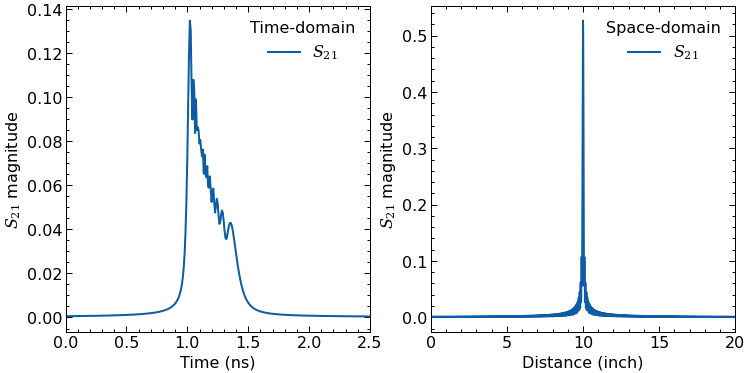

In [6]:
# Plot spatial-domain response
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(t * 1e9, np.abs(s21t), label=r"$S_{21}$")
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.legend(title="Time-domain")
ax1.set_ylabel(r"$S_{21}$ magnitude")
ax1.set_xlabel("Time (ns)")
ax1.set_xlim([0, 2.5])

ax2.plot(x / sc.inch, np.abs(s21x), label=r"$S_{21}$")
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.legend(title="Space-domain")
ax2.set_ylabel(r"$S_{21}$ magnitude")
ax2.set_xlabel("Distance (inch)")
plt.savefig("results/simple-waveguide-time-vs-distance.png", dpi=600)